# Generator functions

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2019 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
%matplotlib inline

import networkx as nx
import numpy as np

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

**Exercise:** In  the  book  I  wrote  a  version  of `random_pairs` that  violates  Ned’s  recommendation  to “abstract your iteration”:

In [2]:
def flip(p):
    return np.random.random() < p

In [3]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

In [4]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j and flip(p):
                yield u, v

In [5]:
nodes = range(4)

In [6]:
for pair in all_pairs(nodes):
    print(pair)

(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)


In [7]:
for pair in random_pairs(nodes, 0.5):
    print(pair)

(1, 2)
(2, 3)


Write a better version of this function that *uses* `all_pairs` rather than copying and modifying it.

In [23]:
import random

def random_pairs(nodes, p):
    for pair in all_pairs(nodes):
        (yield pair) if flip(p) else None
    

for pair in random_pairs(nodes, 0.5):
    print(pair)

(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)


**Exercise:**  Write a function called `random_tree` that takes a number of nodes, `n`, as a parameter and builds an undirected graph by starting with a single node, adding one node at a time, and connecting each new node to one existing node. You can use any of the functions in Python’s `random` module.

In [73]:
def random_tree(n):
    if n == 1:
        g = nx.Graph()
        g.add_node(0)
    else:
        g = random_tree(n-1)
        parent = random.randrange(n-1)
        print(parent,n-1)
        g.add_edge(parent, n-1)
    return g

#%psource nx.Graph

In [80]:
tree = random_tree(10)
tree.nodes()



0 1
0 2
1 3
0 4
0 5
1 6
1 7
2 8
0 9


NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

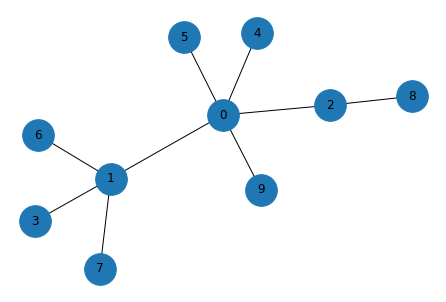

In [81]:
nx.draw(tree, 
        node_color='C0', 
        node_size=1000, 
        with_labels=True)

**Bonus:** Read the various equivalent definitions of tree and then write a function called `is_tree` that takes a graph and returns `True` if the graph is a tree.

In [89]:
def is_tree(g):
    return nx.is_connected(g) and g.number_of_edges()==g.number_of_nodes()-1

is_tree(tree)

%psource tree.neighbors

**Exercise:** Write a function called `all_triangles` that takes an undirected graph as a parameter and returns all triangles, where a triangle is a collection of three nodes that are connected to each other (regardless of whether they are also connected to other nodes). Your solution can be an ordinary function that returns a list of tuples, or a generator function that yields tuples.  It does not have to be particularly efficient. It’s OK if your solution finds the same triangle more than once, but as a bonus challenge, write a solution that avoids it.

In [221]:
def all_triangles(G):
    G = G.copy()
    while G.edges:
        u,v = next(iter(G.edges))
        ws = set(G[u]) & set(G[v])
        for w in ws:
            yield u, v, w
        G.remove_edge(u, v)

In [222]:
# Solution goes here

In [223]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

In [224]:
complete = make_complete_graph(3)
complete.nodes()

NodeView((0, 1, 2))

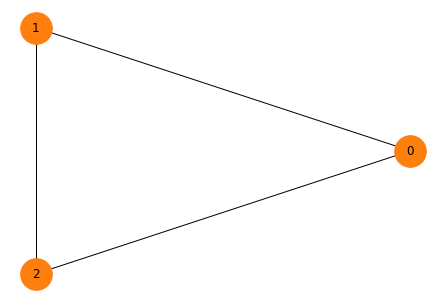

In [225]:
nx.draw_circular(complete, 
                 node_color='C1', 
                 node_size=1000, 
                 with_labels=True)

(0, 1, 2)


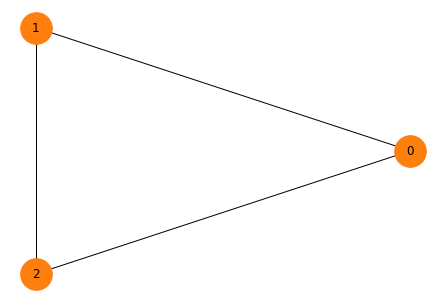

In [226]:
for tri in all_triangles(complete):
    print(tri)
    
nx.draw_circular(complete, 
                 node_color='C1', 
                 node_size=1000, 
                 with_labels=True)

In [227]:
for tri in all_triangles(tree):
    print(tri)